/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


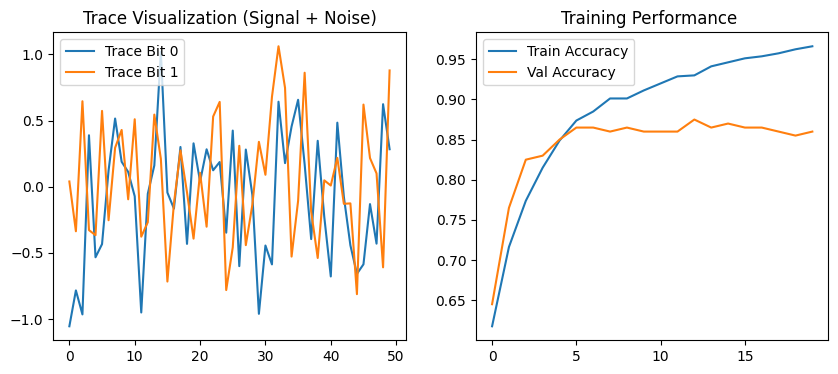

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 1. GÉNÉRATION DE DONNÉES SYNTHÉTIQUES (Simulation de Kyber)
# Imaginons 1000 traces de 50 points de consommation électrique chacune
n_traces = 1000
points_par_trace = 50

# Génération de bits secrets aléatoires (0 ou 1) que le ML doit deviner
labels = np.random.randint(0, 2, n_traces)

# Génération des traces :
# Si le bit est 1, on ajoute un petit "pic" de consommation au point n°25
traces = np.random.normal(0, 0.5, (n_traces, points_par_trace)) # Bruit de fond
for i in range(n_traces):
    if labels[i] == 1:
        traces[i, 25] += 1.2  # Signature de la manipulation du bit '1'

# 2. CONSTRUCTION DU MODÈLE ML (Simple et efficace pour un rapport)
model = Sequential([
    Dense(32, activation='relu', input_shape=(points_par_trace,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Sortie : probabilité entre 0 (bit 0) et 1 (bit 1)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. ENTRAÎNEMENT
X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.2)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# 4. VISUALISATION
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(traces[0], label="Trace Bit 0")
plt.plot(traces[1], label="Trace Bit 1")
plt.title("Trace Visualization (Signal + Noise)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training Performance ")
plt.legend()
plt.show()
